In [9]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [10]:
allFiles = glob.glob("./interpolatedData/*.csv")
print(allFiles)

['./interpolatedData/S-13.csv', './interpolatedData/S-06.csv', './interpolatedData/S-08.csv', './interpolatedData/S-09.csv', './interpolatedData/S-03.csv', './interpolatedData/S-19.csv', './interpolatedData/S-16.csv', './interpolatedData/S-12.csv', './interpolatedData/S-05.csv', './interpolatedData/S-01.csv', './interpolatedData/S-02.csv', './interpolatedData/S-10.csv', './interpolatedData/S-17.csv', './interpolatedData/S-18.csv', './interpolatedData/S-11.csv', './interpolatedData/S-04.csv', './interpolatedData/S-07.csv', './interpolatedData/S-15.csv']


In [11]:
avgData = glob.glob("./stretchedAvgData/*.csv")
print(avgData)

['./stretchedAvgData/EE502 Door Closed.csv', './stretchedAvgData/EE504 Door Open.csv', './stretchedAvgData/EE502 Door Open.csv', './stretchedAvgData/EE502 Negative Pressure.csv']


In [12]:
expData = glob.glob("./stretchedExpirementData/*.csv")
print(expData)

['./stretchedExpirementData/EE502 Negative Pressure Exp3.csv', './stretchedExpirementData/EE502 Door Closed Exp2.csv', './stretchedExpirementData/EE502 Door Closed Exp1.csv', './stretchedExpirementData/EE504 Door Open Exp1.csv', './stretchedExpirementData/EE502 Door Closed Exp3.csv', './stretchedExpirementData/EE502 Door Open Exp2.csv', './stretchedExpirementData/EE504 Door Open Exp3.csv', './stretchedExpirementData/EE502 Door Open Exp3.csv', './stretchedExpirementData/EE504 Door Open Exp2.csv', './stretchedExpirementData/EE502 Door Open Exp1.csv', './stretchedExpirementData/EE502 Negative Pressure Exp2.csv', './stretchedExpirementData/EE502 Negative Pressure Exp1.csv']


In [13]:
df = {}
for x in allFiles:
    name = x.split('/')[1].split('.')[0]
    df[name] = pd.read_csv(x,parse_dates=[0])

In [14]:
mergedData = pd.read_csv('./mergedData/mergedFrame.csv',parse_dates=[0])

In [15]:
stAvgDf = {}
for x in avgData:
    name = x.split('/')[1].split('.')[0]
    stAvgDf[name] = pd.read_csv(x)

In [16]:
stExpDf = {}
for x in expData:
    name = x.split('/')[1].split('.')[0]
    stExpDf[name] = pd.read_csv(x)


/home/bert/anaconda3/envs/myenv/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/bert/anaconda3/envs/myenv/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Variance in Particles')

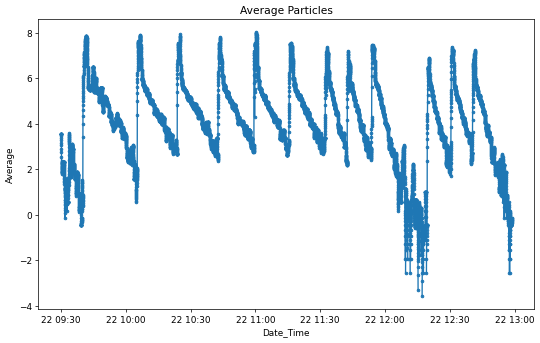

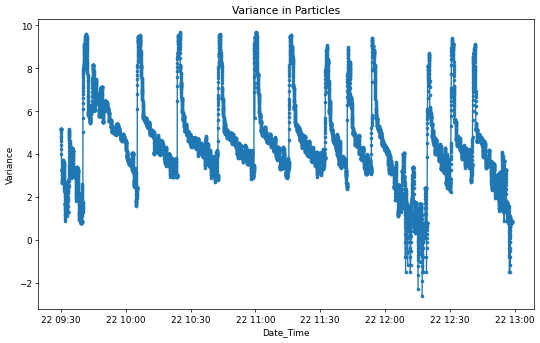

In [17]:
split = len(mergedData)

fig = plt.figure(0, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][:split],np.log(mergedData['Average'][:split])/np.log(3),'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Average')
plt.title('Average Particles')

fig = plt.figure(2, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][:split],np.log(mergedData['Variance'])[:split],'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Variance')
plt.title('Variance in Particles')

# fig = plt.figure(1, figsize=(10,6), dpi=64)
# ax = fig.gca()
# ax.plot(mergedData['Date_Time'][split:],np.log(mergedData['Average'][split:])/np.log(3),'.-')
# ax.set_xlabel(mergedData.columns[0])
# ax.set_ylabel('Average')
# plt.title('Average Particles')

# fig = plt.figure(4, figsize=(10,6), dpi=64)
# ax = fig.gca()
# ax.plot(mergedData['Date_Time'][split:],np.log(mergedData['Variance'])[split:],'.-')
# ax.set_xlabel(mergedData.columns[0])
# ax.set_ylabel('Variance')
# plt.title('Variance in Particles')

In [18]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

color = tableau20

### All Sensors Plotted

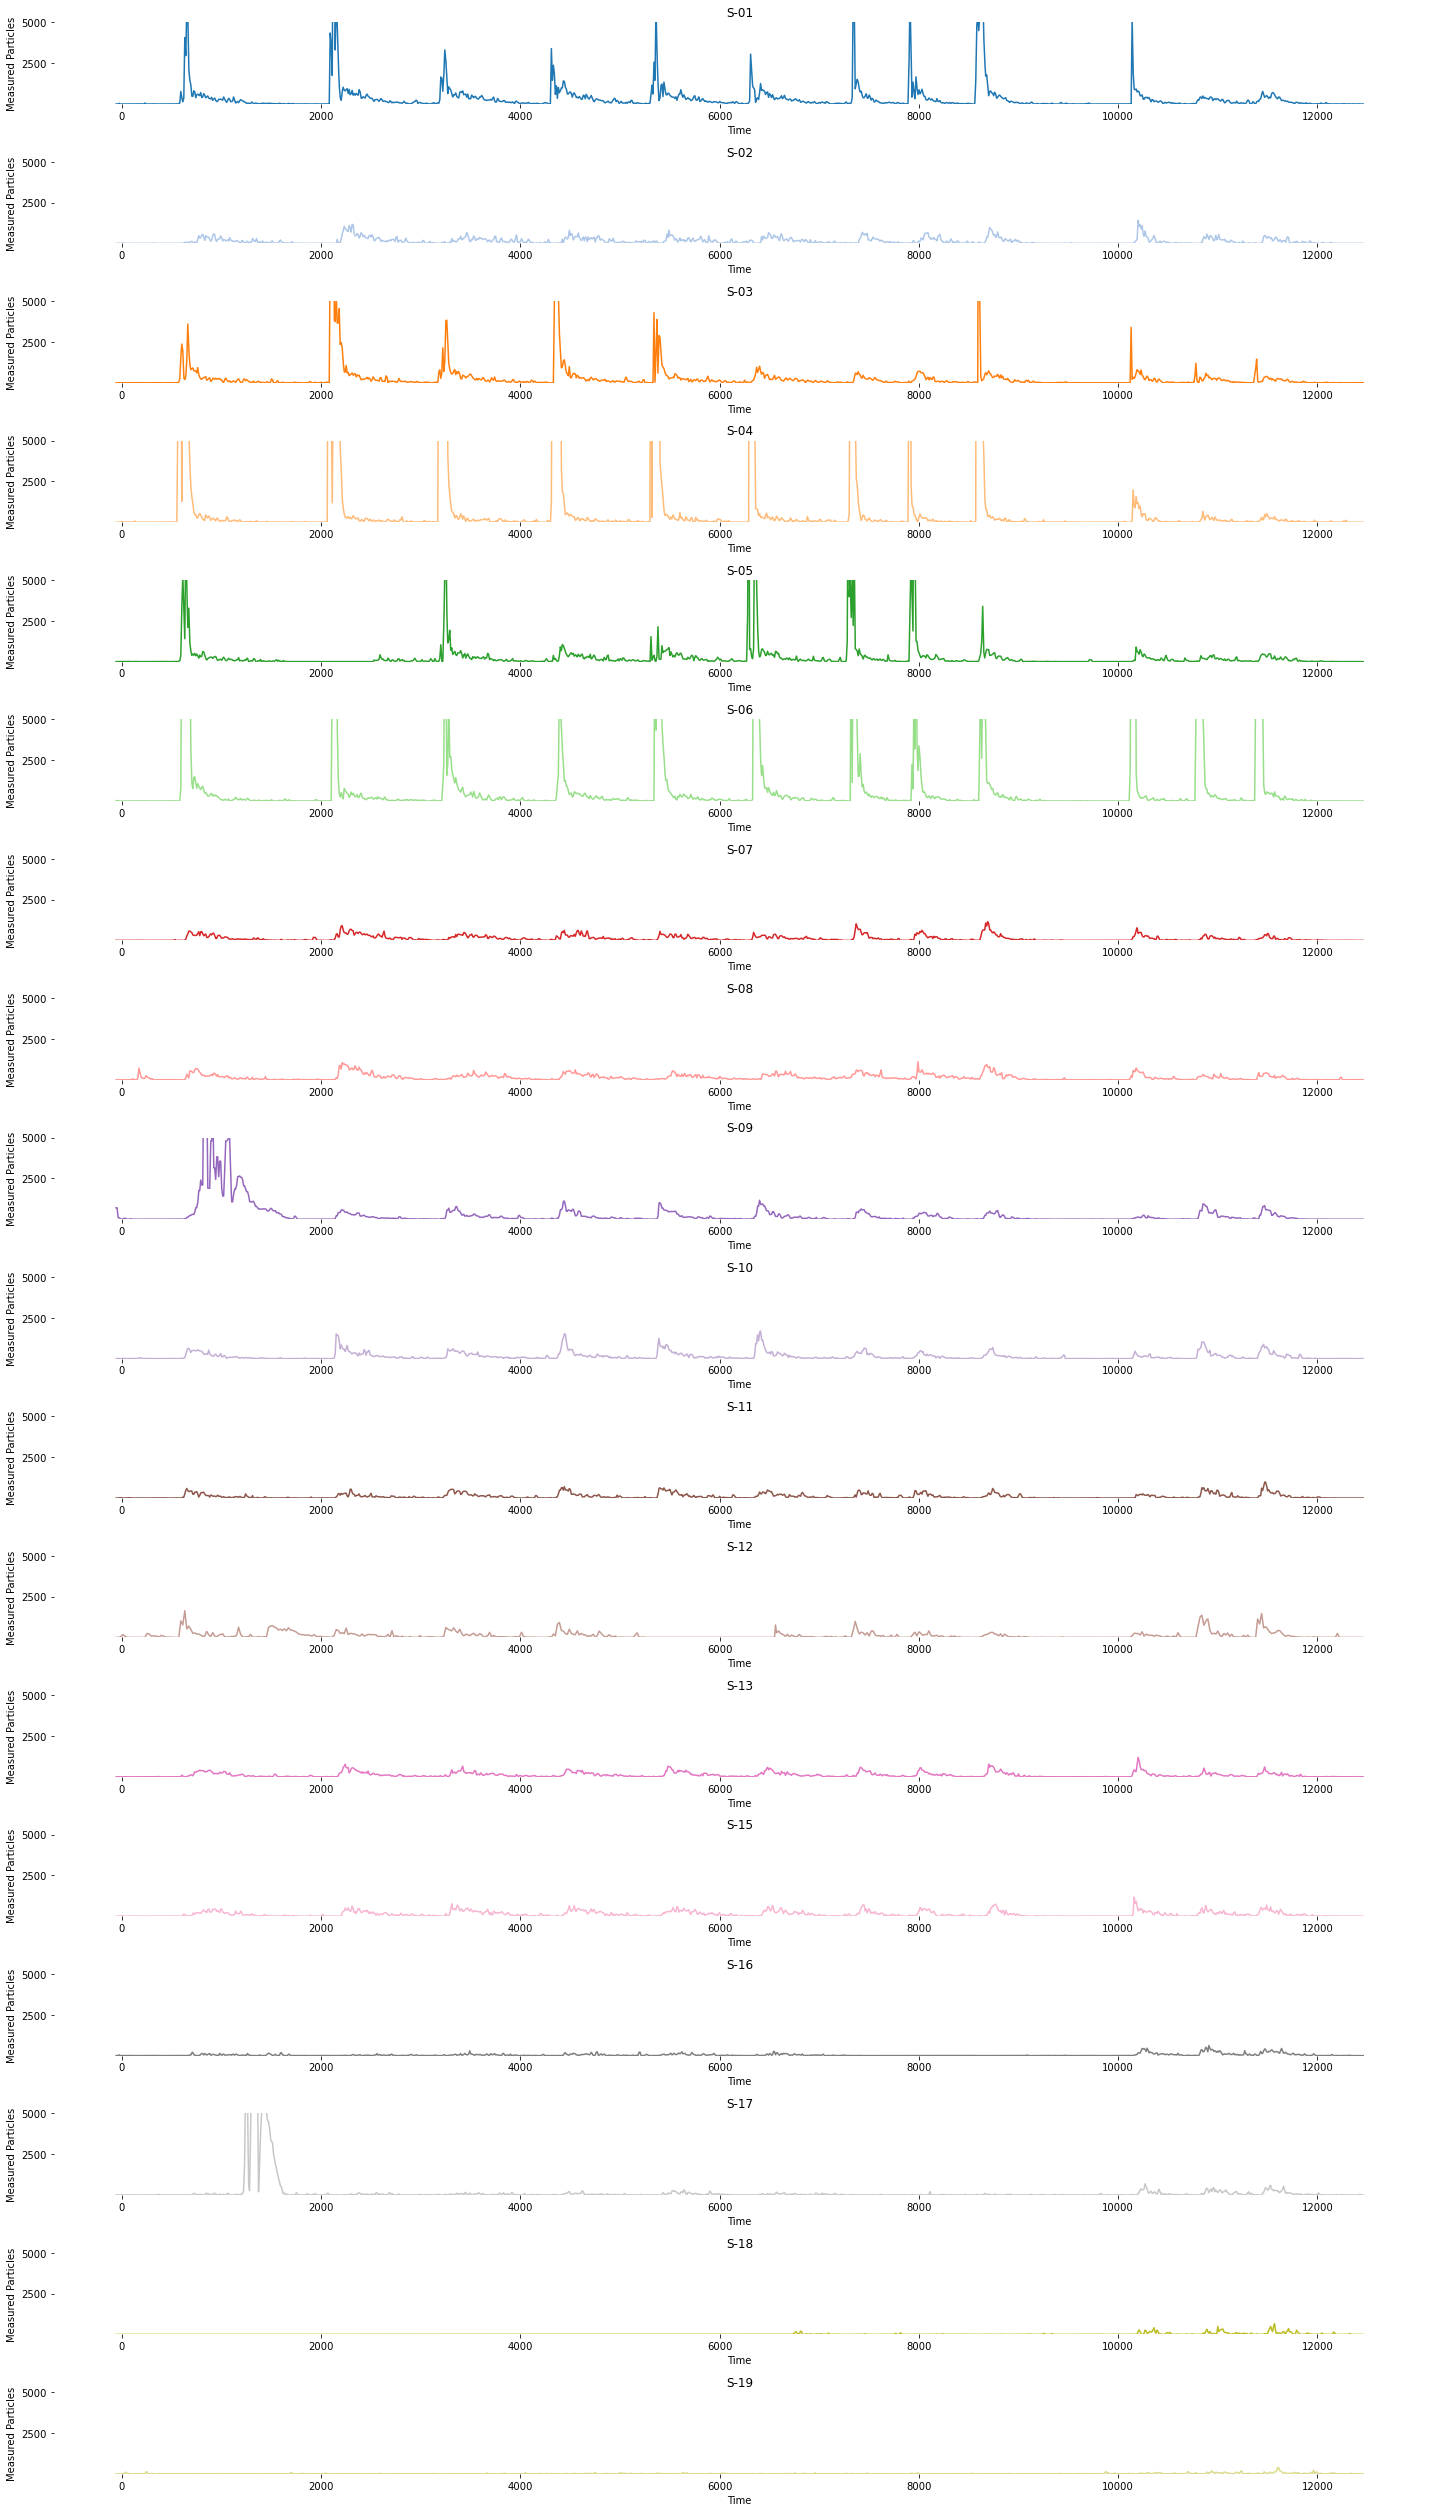

In [19]:

fig,sPlt=plt.subplots(18,sharex=False,sharey=False,figsize=(20,35))
# fig.delaxes(sPlt[1,1])
DataFrame = mergedData

for idx,sensor in enumerate(DataFrame.columns[1:19]):
    yData = (DataFrame[sensor])
    xData = [i for i in range(-60,len(yData)-60)]

    sPlt[idx].plot(xData,yData,color = color[idx],label = sensor)

    sPlt[idx].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[idx].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sPlt[idx].set(title=sensor,xlabel='Time',ylabel='Measured Particles')



for ax in sPlt:
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 
    # ax.legend(prop={'size':9})
    ax.set_ylim([1,5000])
    # ax.set_yscale("log")

    
    
plt.tight_layout()
plt.rcParams.update({'font.size':16})


### Zones Plotted Showing Sensor

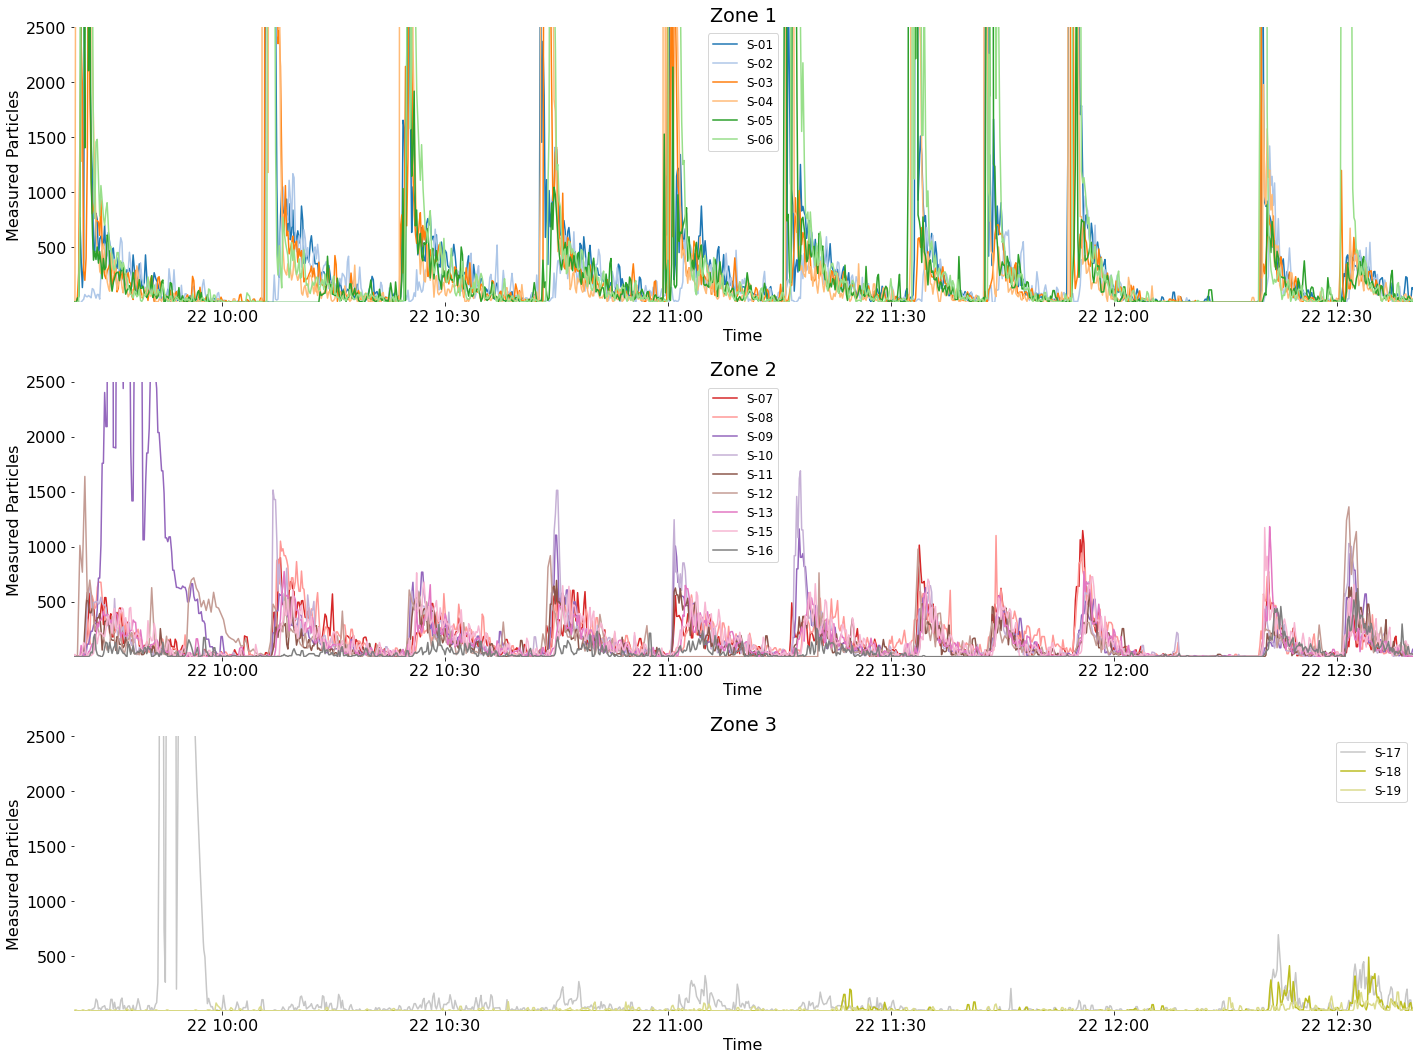

In [20]:

fig,sPlt=plt.subplots(3,sharex=False,sharey=False,figsize=(20,15))
# fig.delaxes(sPlt[1,1])
DataFrame = mergedData

for idx,sensor in enumerate(DataFrame.columns[1:19]):
    if idx < 6:
        num = 0
    elif idx < 15:
        num = 1
    else:
        num = 2

    yData = DataFrame[sensor]
    xData = DataFrame["Date_Time"]

    sPlt[num].plot(xData,yData,color = color[idx],label = sensor)

for i in range(3):
    sPlt[i].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[i].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sensor = ['Zone 1','Zone 2','Zone 3']
    sPlt[i].set(title=sensor[i],xlabel='Time',ylabel='Measured Particles')
    
    yData = DataFrame[DataFrame.keys()[21+i*2]]
    xData = DataFrame["Date_Time"]
    # sPlt[i].plot(xData,yData,color = "Black",label = "Average",linewidth=2)
    # sPlt[i].grid(color='black', linestyle='--', linewidth=.1)



for ax in sPlt:
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 
    ax.legend(prop={'size':12})
    # ax.legend(loc="upper right")
    ax.set_ylim([1,2500])
    ax.set_xlim([pd.Timestamp('3/22/2021 9:40'),pd.Timestamp('3/22/2021 12:40:15')])
    # ax.set_yscale("log")

    
    
plt.tight_layout()
plt.rcParams.update({'font.size':16})


In [21]:
indexList = {}
thresh = 1.5
for notUse,x in enumerate(stAvgDf):
    switch = 1
    for idx,i in enumerate(np.log(stAvgDf[x]['Average'])/np.log(10)):
        if i <= thresh:
            if not switch:
                indexList[x] = idx-120
                switch = 1
                # print(stAvgDf[x]['Average'][idx])
        else:
            switch = 0
    if not switch:
        indexList[x] = idx-120
    print(indexList[x],'seconds',x)

456 seconds stretchedAvgData


/home/bert/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Since 3.2, the parameter *where* must have the same size as [0 60] in fill_betweenx(). This will become an error two minor releases later.


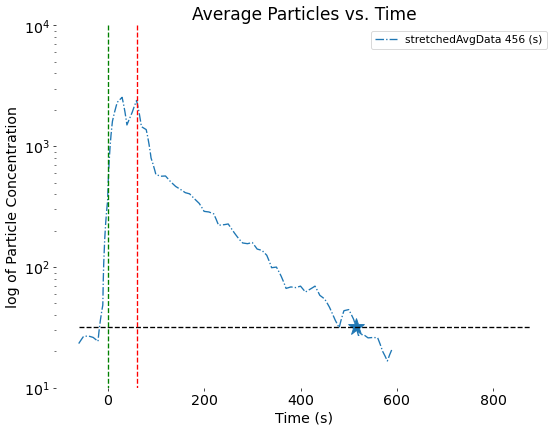

In [22]:
for idx,x in enumerate(stAvgDf):
    if re.match("OR7",x):
        continue
    fig = plt.figure(0, figsize=(10,7.5), dpi=64)
    ax = fig.gca()
    yData = stAvgDf[x]['Average']
    xData = indexList[x]

    ax.plot([i for i in range(-60,len(yData)-60)],yData,'-.',color = color[idx],label = x + ' ' + str(xData) + ' (s)')

    ax.plot([xData+60],[10**thresh],'*',ms=20,color = color[idx])
    # ax.plot([xData,cData],[0,5])

    # ax.plot([i for i in range(-60,len(yData)-60)],yData,'.')
    # ax.plot([xData,xData],[0,200])

# ax.plot([-60,len(yData)-60],[thresh**3,thresh**3],color = 'white')

## plotting lines here
ax.plot([-60,875],[10**thresh]*2,'--',color = 'black')
ax.plot([0,0],[10**4,1],'--',color = 'green')
ax.plot([60,60],[10**4,1],'--',color = 'red')

plt.yscale("log")

plt.ylim([10,10**4])

ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('log of Particle Concentration')
plt.title('Average Particles vs. Time')
ax.spines["top"].set_visible(False)   
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.legend(prop={'size':12})
plt.rcParams.update({'font.size':15})
ax.fill_between([0,60], [1,3], [1,3],facecolor='green',where=True, alpha=0.5)
# #For exporting
# mpld3.save_html(fig,'avgParticlePlot27_Thresh.html')

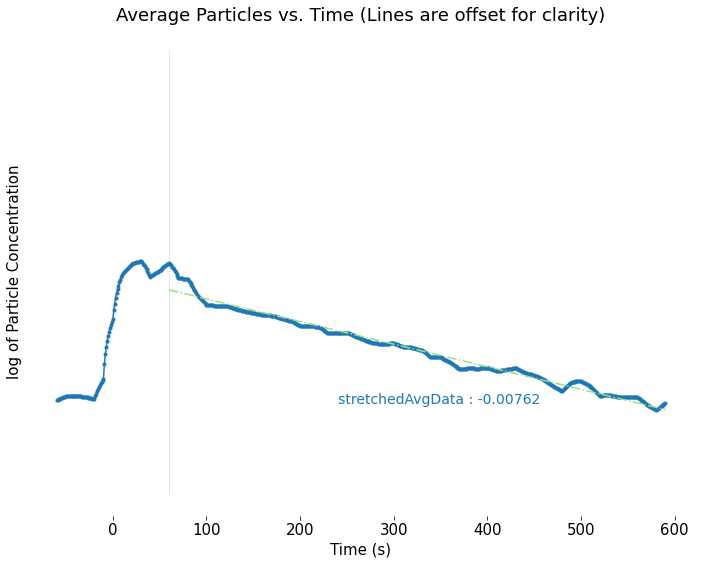

In [23]:
fig = plt.figure(0,figsize=(12,9))
ax = plt.subplot(111)   
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().set_ticks([]) 
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.set_xlabel('Time (s)')
ax.set_ylabel('log of Particle Concentration')
plt.title('Average Particles vs. Time (Lines are offset for clarity)')
plt.plot([60,60], [0,15], "--", lw=0.5, color="black", alpha=0.3)  
spaceFactor = 2

for idx,x in enumerate(stAvgDf):

    yData = stAvgDf[x]['Average']
    xData = indexList[x]

    yPoints = np.log(stAvgDf[x]['Average'][120:])
    xPoints = np.array([i+60 for i in range(len(yPoints))])
    m,b = np.polyfit(xPoints,yPoints,1)
    
    ax.plot([i for i in range(-60,len(yData)-60)],np.log(yData)+idx*spaceFactor,'.-',color = tableau20[idx],label = x + ': Coefficient  ' + str(round(m,3)) )

    ax.plot(xPoints,m*xPoints+b+idx*spaceFactor,'-.',color = tableau20[idx+5])
    y_pos = yPoints.values[-1] + idx*spaceFactor
    plt.text(240, y_pos, x + ' : '+str(round(m,5)), fontsize=14, color=tableau20[idx])    

# # #For Exporting
# mpld3.save_html(fig,'ParticleCountsWithFit.html')


### Plotting Data for Sensors

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


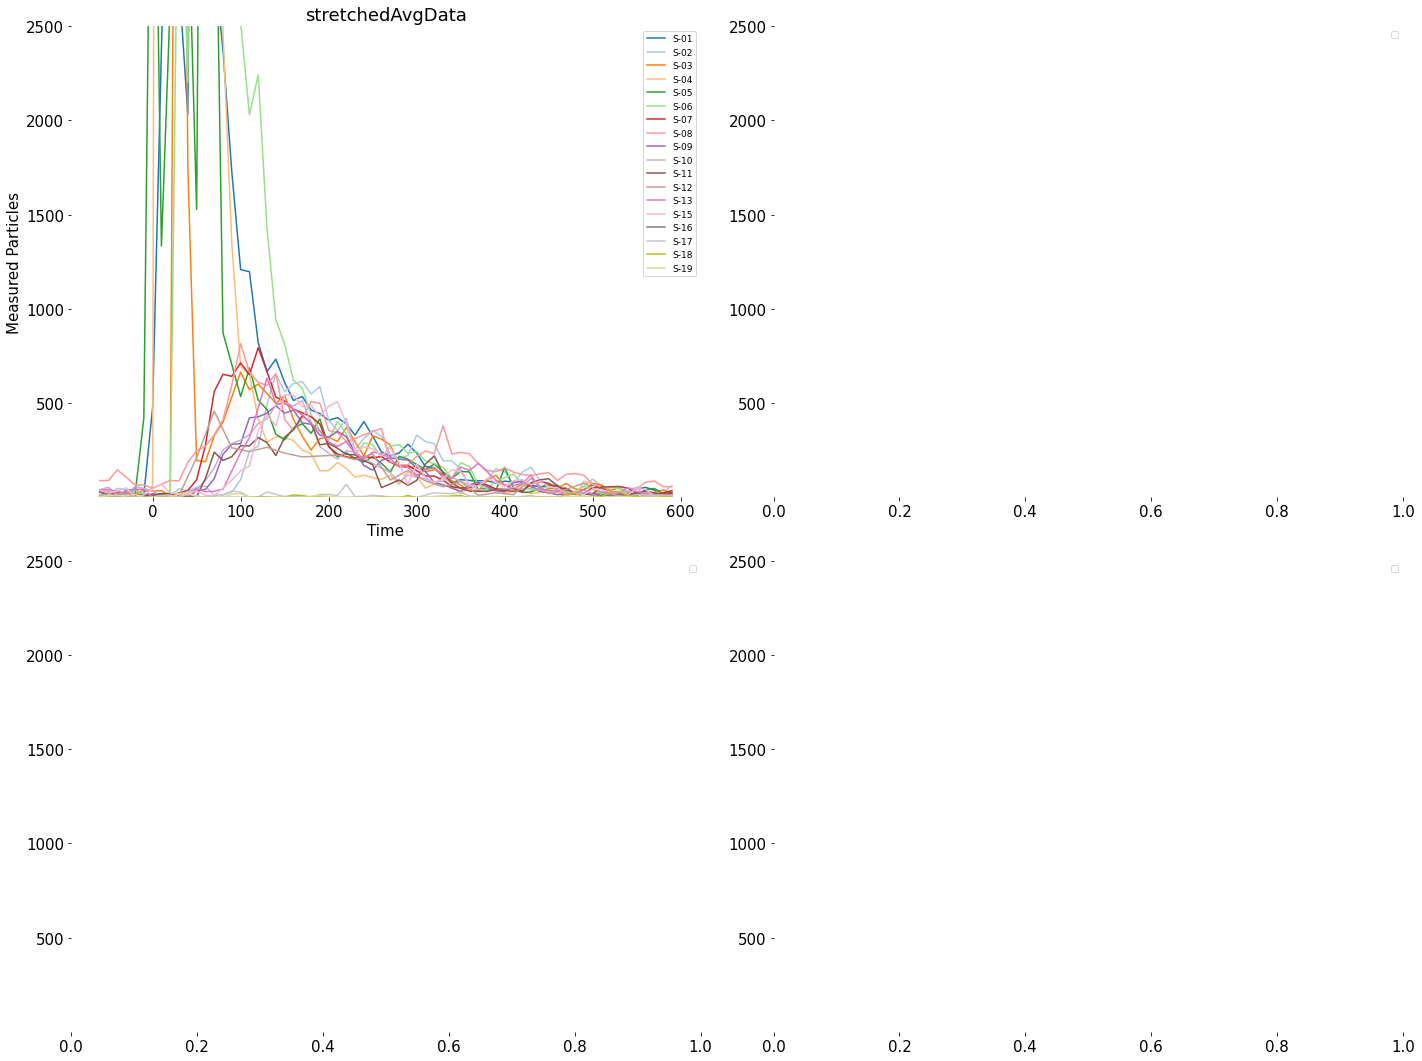

In [24]:

fig,sPlt=plt.subplots(2,2,sharex=False,sharey=False,figsize=(20,15))
# fig.delaxes(sPlt[1,1])
DataFrame = stAvgDf
for idx,x in enumerate(DataFrame):
    for loop,zone in enumerate(DataFrame[x].columns[:18]):
        # if zone == 'S-13':
        #     continue
        yData = (DataFrame[x][zone])
        xData = [i for i in range(-60,len(yData)-60)]

        sPlt[1 if idx > 1 else 0][idx%2].plot(xData,yData,color = color[loop],label = zone)

    sPlt[1 if idx > 1 else 0][idx%2].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[1 if idx > 1 else 0][idx%2].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sPlt[1 if idx > 1 else 0][idx%2].set(title=x,xlabel='Time',ylabel='Measured Particles')


for el in sPlt:
    for ax in el:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend(prop={'size':9})
        ax.set_ylim([1,2500])


plt.tight_layout()
plt.rcParams.update({'font.size':22})


### Plotting Data for Zones

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


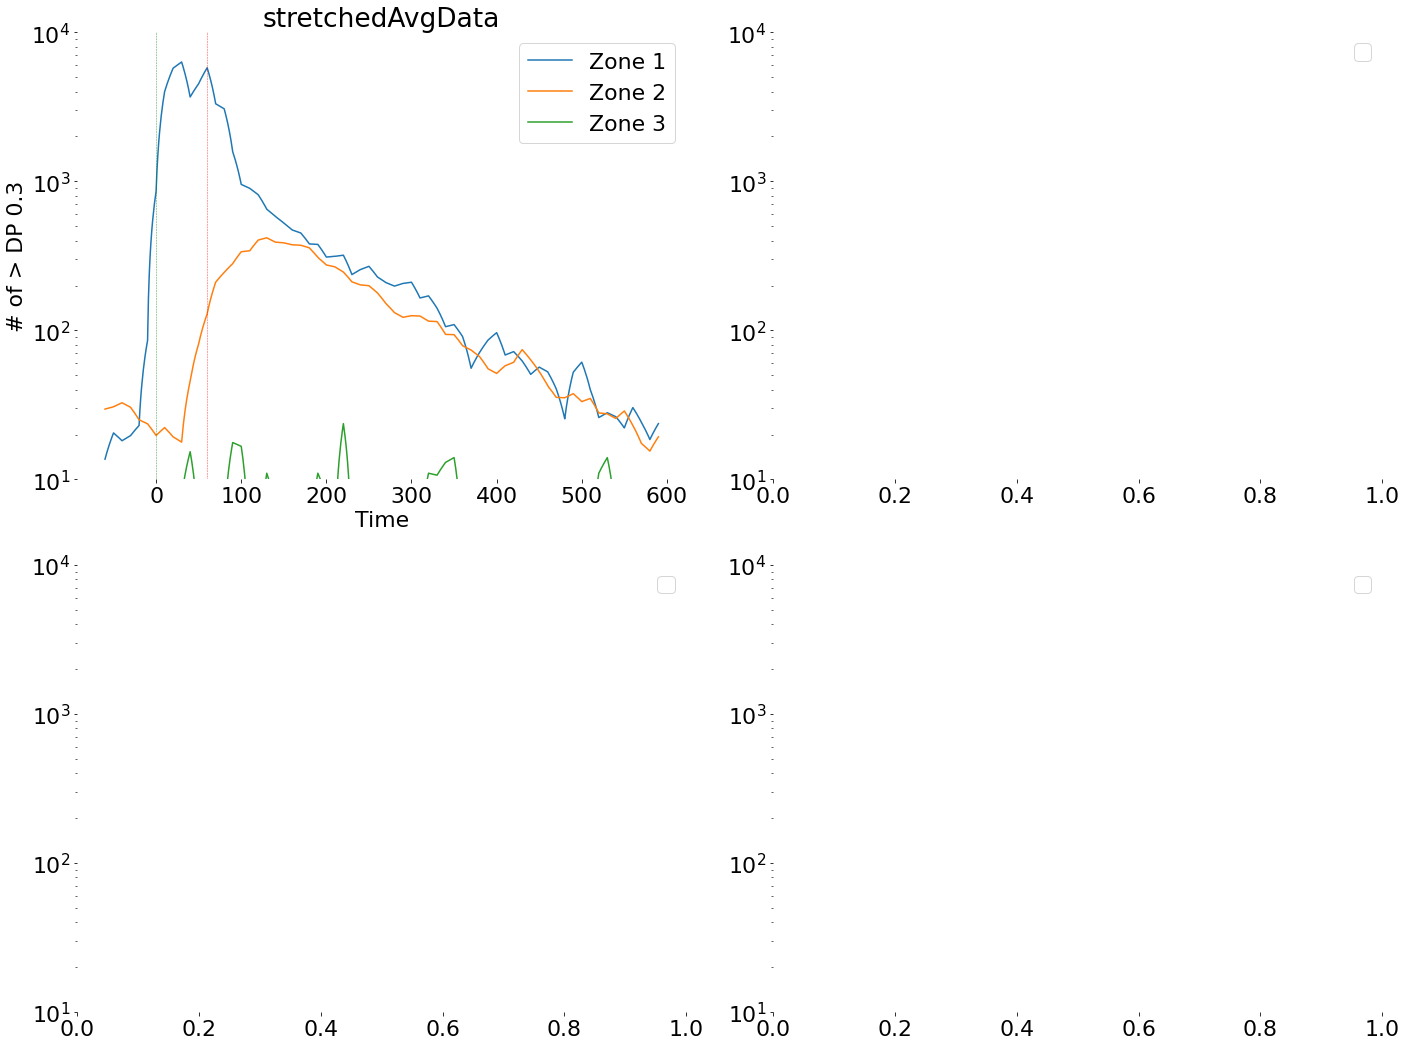

In [25]:

fig,sPlt=plt.subplots(2,2,sharex=False,sharey=False,figsize=(20,15))

DataFrame = stAvgDf
for idx,x in enumerate(DataFrame):
    for loop,zone in enumerate(DataFrame[x].columns[20:]):
        # if True: 

        if re.match(r"Zone",zone):

            yData = (DataFrame[x][zone])
            xData = [i for i in range(-60,len(yData)-60)]

            sPlt[1 if idx > 1 else 0][idx%2].plot(xData,yData,color = color[loop],label = zone)
            
    sPlt[1 if idx > 1 else 0][idx%2].plot([60,60], [1,10**4.5], "--", lw=0.5, color="red", alpha=0.75)
    sPlt[1 if idx > 1 else 0][idx%2].plot([0,0], [1,10**4.5], "--", lw=0.5, color="green", alpha=0.75) 
    sPlt[1 if idx > 1 else 0][idx%2].set(title=x,xlabel='Time',ylabel='# of > DP 0.3')


for el in sPlt:
    for ax in el:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend()
        ax.set_yscale('log')
        ax.set_ylim([10,10**4])

# sPlt[0][1].set(title='OR7 Blocked',xlabel='Time',ylabel='Log of Particle concentration')
# sPlt[0][0].set(title='OR16 Blocked 1')
plt.tight_layout()
plt.rcParams.update({'font.size':16})





In [26]:

fig,sPlt=plt.subplots(2,2,sharex=False,sharey=False,figsize=(20,15))
xData = [i for i in range(-60,len(yData)-60)]
DataFrame = stExpDf
for idx,x in enumerate(DataFrame):
    yData = (DataFrame[x]['Zone 1'])
    for loop,zone in enumerate(DataFrame[x].columns[18:]):

        if re.match(r"Zone",zone):
            if zone == 'Zone 3':
                sPlt[ls00011[idx]][ls01201[idx]].plot(xData,(yData)/3,color = color[1],label = 'Indoor' + str(x.split()[2]))
                yData = (DataFrame[x][zone])
                sPlt[ls00011[idx]][ls01201[idx]].plot(xData,yData,color = color[2],label = 'Outdoor')
            else:
                yData += (DataFrame[x][zone])


    # yPoints = np.log(stAvgDf[x]['Average'][120:])
    # xPoints = np.array([i+60 for i in range(len(yPoints))])
    # m,b = np.polyfit(xPoints,yPoints,1)
    # sPlt[idx%3][1 if idx > 2 else 0].plot(xPoints,xPoints*m+b,color = color[10])
    sPlt[ls00011[idx]][ls01201[idx]].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[ls00011[idx]][ls01201[idx]].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sPlt[ls00011[idx]][ls01201[idx]].set(title=x.split()[0:2],xlabel='Time',ylabel='Measured Particles')

for el in sPlt:
    for ax in el:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend(loc="upper right")
        ax.set_ylim([1,10**3.5])
# sPlt[0][1].set(title='OR7 Blocked',xlabel='Time',ylabel='Log of Particle concentration')
# sPlt[0][0].set(title='OR16 Blocked 1')
plt.tight_layout()
plt.rcParams.update({'font.size':16})


NameError: name 'ls00011' is not defined